# 线性回归（一）

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">0) 介绍一些可能用到的numpy库的函数。</span>

In [2]:
#一些可能用到的numpy库的函数

#创建numpy矩阵
A = np.array([[1, 2, 3],[4, 5, 6]]) #创建矩阵
B = np.ones((3, 2)) #创建全1矩阵
C = np.zeros((3, 2)) #创建全0矩阵
print('A:\n',A,'\n')
print('B:\n',B,'\n')
print('C:\n',C,'\n')

A:
 [[1 2 3]
 [4 5 6]] 

B:
 [[1. 1.]
 [1. 1.]
 [1. 1.]] 

C:
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 



In [3]:
#提取矩阵的某几行和某几列
D = np.array([[1, 0, 0, 0],[0, 2, 0, 0],[0, 0, 3, 0],[0, 0, 0, 4]])
print('D:\n',D,'\n')
print(D[0:2, 1:3],'\n') #提取矩阵的0-1行、1-2列的元素，返回一个2×2的矩阵
print(D[:, 2:3],'\n') #提取第2列上的所有元素，返回一个4×1的矩阵

D:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] 

[[0 0]
 [2 0]] 

[[0]
 [0]
 [3]
 [0]] 



In [4]:
#矩阵的转置
E = np.array([[3,2,1],[6,8,3]])
print('E:\n',E,'\n')
print('The transpose of E:\n',E.T,'\n')

E:
 [[3 2 1]
 [6 8 3]] 

The transpose of E:
 [[3 6]
 [2 8]
 [1 3]] 



In [5]:
#矩阵的加/减/星乘(要求两个矩阵的行数相同、列数也相同)
F = np.array([[0,1,1],[4,2,3]])
G = np.array([[0,8,1],[4,4,4]])
print('F:\n',F,'\n')
print('G:\n',G,'\n')
print('F + G:\n',F + G,'\n')
print('F - G:\n',F - G,'\n')
print('F * G:\n',F * G,'\n') #对应位置相乘

F:
 [[0 1 1]
 [4 2 3]] 

G:
 [[0 8 1]
 [4 4 4]] 

F + G:
 [[0 9 2]
 [8 6 7]] 

F - G:
 [[ 0 -7  0]
 [ 0 -2 -1]] 

F * G:
 [[ 0  8  1]
 [16  8 12]] 



In [6]:
#矩阵点乘(注意前一个矩阵的列数要等于后一个矩阵的行数才能进行点乘)
H = np.array([[2,1,1],[9,2,3]])
I = np.array([[0,8],[4,4],[5,5]])
print('H:\n',H,'\n')
print('I:\n',I,'\n')
print('H.dot(I):\n',H.dot(I),'\n')


H:
 [[2 1 1]
 [9 2 3]] 

I:
 [[0 8]
 [4 4]
 [5 5]] 

H.dot(I):
 [[ 9 25]
 [23 95]] 



In [7]:
#矩阵(非奇异方阵)的求逆
J = np.array([[1, 0, 0],[0, 2, 0],[0, 0, 3]])
print('J:\n',J,'\n')
print('The inverse of J:\n',np.linalg.inv(J),'\n')


J:
 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

The inverse of J:
 [[1.         0.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.         0.33333333]] 



In [8]:
#矩阵的拼接
K = np.array([[1, 2, 3], [4, 5, 6]])
L = np.array([[7, 8, 9], [10, 11, 12]])
print('K:\n',K,'\n')
print('L:\n',L,'\n')
print('\n',np.r_[K, L],'\n') #上下拼接
print('\n',np.c_[K, L],'\n') #左右拼接

K:
 [[1 2 3]
 [4 5 6]] 

L:
 [[ 7  8  9]
 [10 11 12]] 


 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 


 [[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]] 



In [9]:
#矩阵的求和
M = np.array([[5,0,2],[3,5,8]])
print('M:\n',M,'\n')
print('The sum of M:\n',np.sum(M),'\n')

M:
 [[5 0 2]
 [3 5 8]] 

The sum of M:
 23 



<span style="color:purple">1) 使用pandas库的read_csv()函数(可以参考[pandas的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'和测试数据集'test.csv'载入到Dataframe对象中。</span>

In [2]:
# Your code here

#读取数据集
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')

#转化成numpy矩阵
train = np.array(train_frame)
test = np.array(test_frame)

#train,test

<span style="color:purple">2) 假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>

方法① 

将$l(w,b)$分别对$w$和$b$求导，得到
$$
\frac{\partial l(w,b)}{\partial w}=w\sum_{i=1}^m x_i^2 -\sum_{i=1}^m (y_i-b)x_i,
$$
$$
\frac{\partial l(w,b)}{\partial b}=mb -\sum_{i=1}^m (y_i-wx_i),
$$
令上述两式为零即可得到$w$和$b$的解析解：
$$
w=\frac{\sum_{i=1}^m y_i (x_i-\bar{x})}{\sum_{i=1}^m x_i^2-\frac{1}{m}(\sum_{i=1}^m x_i)^2},
$$
$$
b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i),
$$
其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x_i$为$x$的均值。



In [16]:
# Your code here
x=train[:,0]
y=train[:,1]
x_tem=x-x.mean()
x_2=x**2
x_sum=np.sum(x)
x_2sum=np.sum(x_2)
w=np.sum(y*x_tem)/(x_2sum-x_sum**2/len(x))
b=np.sum(y-w*x)/len(x)



方法② 梯度下降法。

方法③ 

用矩阵表示，假设数据集有$m$个样本，特征有$n$维$。X=\left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
                         x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
                         \vdots & \vdots &      & \vdots & \vdots \\
                         x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \end{matrix} \right]$,
        实际标签$Y=\left[ \begin{matrix} y_{1} \\
                         y_{2} \\
                         \vdots \\
                         y_{m}\end{matrix} \right]$,
        参数$B=\left[ \begin{matrix} w_{1} \\
                         w_{2} \\
                         \vdots \\
                         w_{n} \\
                         b\end{matrix} \right]$，则解析解为$B^*=(X^T X)^{-1}X^T Y$。推导过程可参考[这篇文章](https://zhuanlan.zhihu.com/p/74157986)。

In [5]:
# Your code here
X=train[:,0]
tem=np.ones(len(X))
X=np.c_[X,tem]
Y=train[:,1]
X_T=X.T
B1=np.linalg.inv(X_T.dot(X))
B2=X_T.dot(Y)
B=B1.dot(B2)

<span style="color:purple">3) 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>

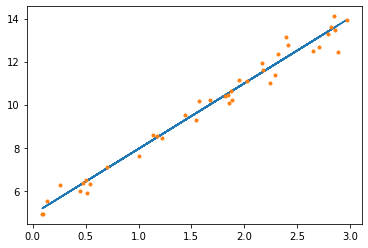

In [20]:
# Your code here
#A=np.array([[1,2,3],[4,5,6],[7,8,9]])
#x = A[0, :] #从一个矩阵中提取出一行作为一个向量
#y1 = np.array([2, 3, 5])
#plt.plot(x, y1) #画出折线图
#y2 = np.array([2.5, 2.8, 5.3])
#plt.plot(x, y2, '.') #画出散点图
#plt.show()
x_test=test[:,0]
y_test=test[:,1]
y_fore=w*x_test+b
plt.plot(x_test,y_fore)
plt.plot(x_test,y_test,'.')
plt.show()

<span style="color:purple">4) 在训练数据集'train2.csv'上求一个三元线性回归模型$\hat{y}=w_1 x_1 + w_2 x_2 + w_3 x_3 + b$的使得损失函数$l(w_1,w_2,w_3,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_1,w_2,w_3$以及$b$。并在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2$, $n$为测试集中样本个数。</span>

方法① 同2)中的方法③。

In [6]:
train_frame2 = pd.read_csv('train2.csv')
test_frame2 = pd.read_csv('test2.csv')


train2 = np.array(train_frame2)
test2 = np.array(test_frame2)

In [11]:
# Your code here


X2=train2[:,0:3]
tem2=np.ones(160)
X2=np.c_[X2,tem2]
Y2=train2[:,3]
X2_T=X2.T
B1=np.linalg.inv(X2_T.dot(X2))
B2=X2_T.dot(Y2)
B=B1.dot(B2)
X2_test=test2[:,0:3]
tem2=np.ones(40)
X2_test=np.c_[X2_test,tem2]
Y2_fore=X2_test.dot(B)
Y2_test=test2[:,3]
Y_tem=Y2_test-Y2_fore
Y2_2=Y_tem**2
MS=np.sum(Y2_2)/len(Y2_test)
print(MS)
Y2_fore

0.1653769112895277


array([17.07849006, 25.25652216, 14.64067789, 14.44507246, 22.23934091,
       27.74785241, 28.33844735, 28.46399336, 31.7631642 , 12.6567351 ,
       16.68427426, 28.98494171, 14.76765878, 22.31611784, 11.5829012 ,
       25.38587601, 26.77910839, 25.45513489, 15.74162917, 18.97715381,
       16.37159299, 17.05247562, 21.28019597, 23.87259121, 22.25092339,
       16.81128158, 29.34148848, 26.3943862 , 12.42412934, 24.55103391,
       16.84732392, 18.46658344, 22.6422135 , 10.98359114, 28.14896566,
       21.3815645 , 22.91477009, 18.10704587, 23.71676355, 21.73675077])

方法② 梯度下降法。(暂时不用实现)